In [361]:
import pandas as pd
import numpy as np
import seaborn as sns

In [56]:
hki = pd.read_csv("Vantaa Helsinki-Vantaan lentoasema_ 1.1.1990 - 19.2.2025.csv",na_values="-")

In [58]:
hki.head()

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Maanpintaminimi [°C],Ylin lämpötila [°C],Alin lämpötila [°C]
0,Vantaa Helsinki-Vantaan lentoasema,1990,1,1,02:00,0.1,8.0,-5.4,NaN,-2.1,-8.9
1,Vantaa Helsinki-Vantaan lentoasema,1990,1,1,07:40,NaN,NaN,NaN,-13.3,NaN,NaN
2,Vantaa Helsinki-Vantaan lentoasema,1990,1,2,02:00,0.1,8.0,-4.6,NaN,-3.0,-6.0
3,Vantaa Helsinki-Vantaan lentoasema,1990,1,2,07:40,NaN,NaN,NaN,-4.4,NaN,NaN
4,Vantaa Helsinki-Vantaan lentoasema,1990,1,3,02:00,0.2,8.0,-12.3,NaN,-4.7,-16.6


In [60]:
hki.apply(pd.isnull).sum()

Havaintoasema                    0
Vuosi                            0
Kuukausi                         0
Päivä                            0
Aika [Paikallinen aika]          0
Sademäärä [mm]               11726
Lumensyvyys [cm]             11730
Ilman keskilämpötila [°C]    11726
Maanpintaminimi [°C]         12839
Ylin lämpötila [°C]          11730
Alin lämpötila [°C]          11730
dtype: int64

In [62]:
null_pct = hki.apply(pd.isnull).sum()/hki.shape[0]
null_pct

Havaintoasema                0.000000
Vuosi                        0.000000
Kuukausi                     0.000000
Päivä                        0.000000
Aika [Paikallinen aika]      0.000000
Sademäärä [mm]               0.477462
Lumensyvyys [cm]             0.477625
Ilman keskilämpötila [°C]    0.477462
Maanpintaminimi [°C]         0.522782
Ylin lämpötila [°C]          0.477625
Alin lämpötila [°C]          0.477625
dtype: float64

In [65]:
hki.head()

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Maanpintaminimi [°C],Ylin lämpötila [°C],Alin lämpötila [°C]
0,Vantaa Helsinki-Vantaan lentoasema,1990,1,1,02:00,0.1,8.0,-5.4,NaN,-2.1,-8.9
1,Vantaa Helsinki-Vantaan lentoasema,1990,1,1,07:40,NaN,NaN,NaN,-13.3,NaN,NaN
2,Vantaa Helsinki-Vantaan lentoasema,1990,1,2,02:00,0.1,8.0,-4.6,NaN,-3.0,-6.0
3,Vantaa Helsinki-Vantaan lentoasema,1990,1,2,07:40,NaN,NaN,NaN,-4.4,NaN,NaN
4,Vantaa Helsinki-Vantaan lentoasema,1990,1,3,02:00,0.2,8.0,-12.3,NaN,-4.7,-16.6


In [67]:
group_cols = ["Havaintoasema", "Vuosi", "Kuukausi", "Päivä"]

In [69]:
hki_combined = hki.groupby(group_cols, as_index=False).apply(lambda g: g.bfill().iloc[0])

C:\Users\nikla\AppData\Local\Temp\ipykernel_24260\1153265893.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hki_combined = hki.groupby(group_cols, as_index=False).apply(lambda g: g.bfill().iloc[0])


In [70]:
hki_combined.reset_index(drop=True, inplace=True)

In [71]:
hki_combined

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Maanpintaminimi [°C],Ylin lämpötila [°C],Alin lämpötila [°C]
0,Vantaa Helsinki-Vantaan lentoasema,1990,1,1,02:00,0.1,8.0,-5.4,-13.3,-2.1,-8.9
1,Vantaa Helsinki-Vantaan lentoasema,1990,1,2,02:00,0.1,8.0,-4.6,-4.4,-3.0,-6.0
2,Vantaa Helsinki-Vantaan lentoasema,1990,1,3,02:00,0.2,8.0,-12.3,-13.5,-4.7,-16.6
3,Vantaa Helsinki-Vantaan lentoasema,1990,1,4,02:00,1.7,8.0,-4.4,-19.4,-1.4,-17.5
4,Vantaa Helsinki-Vantaan lentoasema,1990,1,5,02:00,0.0,10.0,-1.0,-1.5,-0.2,-1.8
...,...,...,...,...,...,...,...,...,...,...,...
12829,Vantaa Helsinki-Vantaan lentoasema,2025,2,15,02:00,-1.0,2.0,-8.4,NaN,-6.2,-12.5
12830,Vantaa Helsinki-Vantaan lentoasema,2025,2,16,02:00,2.3,2.0,-10.7,NaN,-6.7,-16.2
12831,Vantaa Helsinki-Vantaan lentoasema,2025,2,17,02:00,-1.0,7.0,-8.4,NaN,-4.7,-13.1
12832,Vantaa Helsinki-Vantaan lentoasema,2025,2,18,02:00,0.3,6.0,-5.8,NaN,-1.7,-14.7


In [72]:
hki_combined.apply(pd.isnull).sum()

Havaintoasema                   0
Vuosi                           0
Kuukausi                        0
Päivä                           0
Aika [Paikallinen aika]         0
Sademäärä [mm]                  1
Lumensyvyys [cm]                5
Ilman keskilämpötila [°C]       1
Maanpintaminimi [°C]         1114
Ylin lämpötila [°C]             5
Alin lämpötila [°C]             5
dtype: int64

In [73]:
null_pct2 = hki_combined.apply(pd.isnull).sum()/hki_combined.shape[0]
null_pct2

Havaintoasema                0.000000
Vuosi                        0.000000
Kuukausi                     0.000000
Päivä                        0.000000
Aika [Paikallinen aika]      0.000000
Sademäärä [mm]               0.000078
Lumensyvyys [cm]             0.000390
Ilman keskilämpötila [°C]    0.000078
Maanpintaminimi [°C]         0.086801
Ylin lämpötila [°C]          0.000390
Alin lämpötila [°C]          0.000390
dtype: float64

In [74]:
valid_columns = hki_combined.columns[null_pct2 < 0.05]

In [81]:
valid_columns

Index(['Havaintoasema', 'Vuosi', 'Kuukausi', 'Päivä',
       'Aika [Paikallinen aika]', 'Sademäärä [mm]', 'Lumensyvyys [cm]',
       'Ilman keskilämpötila [°C]', 'Ylin lämpötila [°C]',
       'Alin lämpötila [°C]'],
      dtype='object')

In [83]:
hki = hki_combined[valid_columns].copy()

In [85]:
hki.apply(pd.isnull).sum()

Havaintoasema                0
Vuosi                        0
Kuukausi                     0
Päivä                        0
Aika [Paikallinen aika]      0
Sademäärä [mm]               1
Lumensyvyys [cm]             5
Ilman keskilämpötila [°C]    1
Ylin lämpötila [°C]          5
Alin lämpötila [°C]          5
dtype: int64

In [87]:
hki.head()

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C]
0,Vantaa Helsinki-Vantaan lentoasema,1990,1,1,02:00,0.1,8.0,-5.4,-2.1,-8.9
1,Vantaa Helsinki-Vantaan lentoasema,1990,1,2,02:00,0.1,8.0,-4.6,-3.0,-6.0
2,Vantaa Helsinki-Vantaan lentoasema,1990,1,3,02:00,0.2,8.0,-12.3,-4.7,-16.6
3,Vantaa Helsinki-Vantaan lentoasema,1990,1,4,02:00,1.7,8.0,-4.4,-1.4,-17.5
4,Vantaa Helsinki-Vantaan lentoasema,1990,1,5,02:00,0.0,10.0,-1.0,-0.2,-1.8


In [89]:
hki = hki.ffill()

In [91]:
hki.apply(pd.isnull).sum()

Havaintoasema                0
Vuosi                        0
Kuukausi                     0
Päivä                        0
Aika [Paikallinen aika]      0
Sademäärä [mm]               0
Lumensyvyys [cm]             0
Ilman keskilämpötila [°C]    0
Ylin lämpötila [°C]          0
Alin lämpötila [°C]          0
dtype: int64

In [93]:
hki.dtypes

Havaintoasema                 object
Vuosi                          int64
Kuukausi                       int64
Päivä                          int64
Aika [Paikallinen aika]       object
Sademäärä [mm]               float64
Lumensyvyys [cm]             float64
Ilman keskilämpötila [°C]    float64
Ylin lämpötila [°C]          float64
Alin lämpötila [°C]          float64
dtype: object

In [95]:
hki.index

RangeIndex(start=0, stop=12834, step=1)

In [97]:
hki.Vuosi.value_counts().sort_index()

Vuosi
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    366
2025     50
Name: count, dtype: int64

<Axes: >

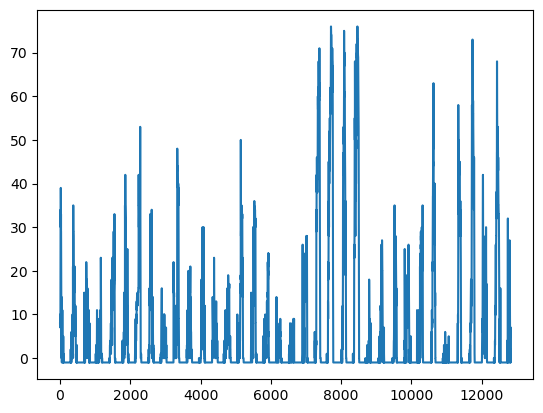

In [99]:
hki["Lumensyvyys [cm]"].plot()

In [102]:
hki['date'] = pd.to_datetime(hki['Vuosi'].astype(str) + '-' + 
                              hki['Kuukausi'].astype(str) + '-' + 
                              hki['Päivä'].astype(str))

# Optionally, drop the separate columns if you no longer need them:
hki.drop(columns=['Vuosi', 'Kuukausi', 'Päivä'], inplace=True)

In [104]:
hki['date'] = pd.to_datetime(hki['date'])
hki.set_index('date', inplace=True)

In [325]:
hki.index

DatetimeIndex(['1990-01-29', '1990-01-30', '1990-01-31', '1990-02-01',
               '1990-02-02', '1990-02-03', '1990-02-04', '1990-02-05',
               '1990-02-06', '1990-02-07',
               ...
               '2025-02-10', '2025-02-11', '2025-02-12', '2025-02-13',
               '2025-02-14', '2025-02-15', '2025-02-16', '2025-02-17',
               '2025-02-18', '2025-02-19'],
              dtype='datetime64[ns]', name='date', length=12806, freq=None)

<Axes: xlabel='date'>

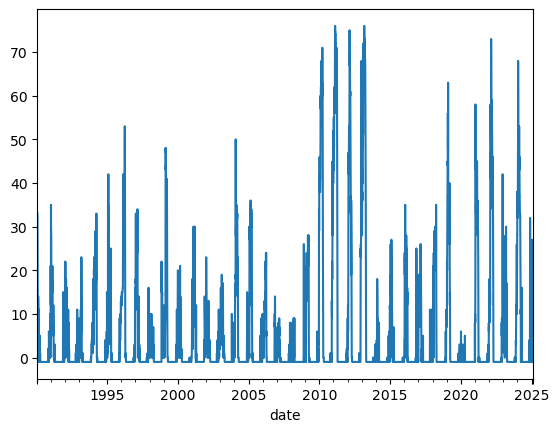

In [333]:
hki["Lumensyvyys [cm]"].plot()

<Axes: xlabel='date'>

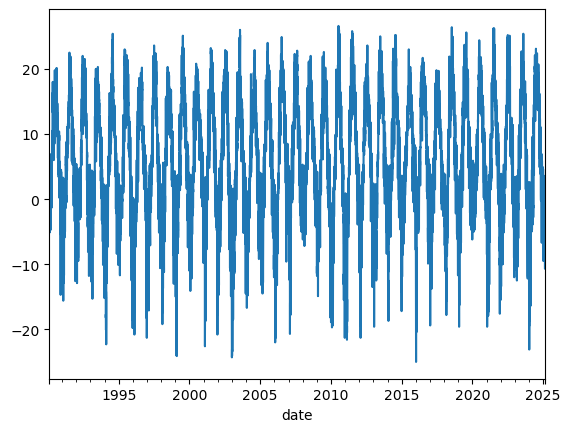

In [409]:
hki.loc["1990-01":"2025-12","Ilman keskilämpötila [°C]"].plot()

<Axes: xlabel='Ilman keskilämpötila [°C]', ylabel='Sademäärä [mm]'>

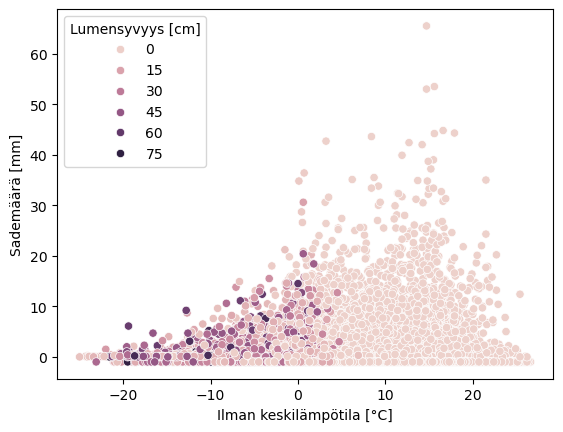

In [397]:
sns.scatterplot(x="Ilman keskilämpötila [°C]", y="Sademäärä [mm]", data=hki, hue="Lumensyvyys [cm]")

In [108]:
hki.dtypes

Havaintoasema                 object
Aika [Paikallinen aika]       object
Sademäärä [mm]               float64
Lumensyvyys [cm]             float64
Ilman keskilämpötila [°C]    float64
Ylin lämpötila [°C]          float64
Alin lämpötila [°C]          float64
dtype: object

In [110]:
hki.head()

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C]
date,,,,,,,
1990-01-01,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,8.0,-5.4,-2.1,-8.9
1990-01-02,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,8.0,-4.6,-3.0,-6.0
1990-01-03,Vantaa Helsinki-Vantaan lentoasema,02:00,0.2,8.0,-12.3,-4.7,-16.6
1990-01-04,Vantaa Helsinki-Vantaan lentoasema,02:00,1.7,8.0,-4.4,-1.4,-17.5
1990-01-05,Vantaa Helsinki-Vantaan lentoasema,02:00,0.0,10.0,-1.0,-0.2,-1.8


In [112]:
hki["Target"] = hki.shift(-1)["Ylin lämpötila [°C]"]

In [114]:
hki

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target
date,,,,,,,,
1990-01-01,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,8.0,-5.4,-2.1,-8.9,-3.0
1990-01-02,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,8.0,-4.6,-3.0,-6.0,-4.7
1990-01-03,Vantaa Helsinki-Vantaan lentoasema,02:00,0.2,8.0,-12.3,-4.7,-16.6,-1.4
1990-01-04,Vantaa Helsinki-Vantaan lentoasema,02:00,1.7,8.0,-4.4,-1.4,-17.5,-0.2
1990-01-05,Vantaa Helsinki-Vantaan lentoasema,02:00,0.0,10.0,-1.0,-0.2,-1.8,-1.5
...,...,...,...,...,...,...,...,...
2025-02-15,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,2.0,-8.4,-6.2,-12.5,-6.7
2025-02-16,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,2.0,-10.7,-6.7,-16.2,-4.7
2025-02-17,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,7.0,-8.4,-4.7,-13.1,-1.7


In [116]:
hki = hki.ffill()

In [118]:
hki

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target
date,,,,,,,,
1990-01-01,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,8.0,-5.4,-2.1,-8.9,-3.0
1990-01-02,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,8.0,-4.6,-3.0,-6.0,-4.7
1990-01-03,Vantaa Helsinki-Vantaan lentoasema,02:00,0.2,8.0,-12.3,-4.7,-16.6,-1.4
1990-01-04,Vantaa Helsinki-Vantaan lentoasema,02:00,1.7,8.0,-4.4,-1.4,-17.5,-0.2
1990-01-05,Vantaa Helsinki-Vantaan lentoasema,02:00,0.0,10.0,-1.0,-0.2,-1.8,-1.5
...,...,...,...,...,...,...,...,...
2025-02-15,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,2.0,-8.4,-6.2,-12.5,-6.7
2025-02-16,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,2.0,-10.7,-6.7,-16.2,-4.7
2025-02-17,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,7.0,-8.4,-4.7,-13.1,-1.7


In [120]:
corr_matrix = hki.corr(numeric_only=True)
corr_matrix


,Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target
Sademäärä [mm],1.000000,-0.029691,0.033586,-0.011120,0.085365,-0.011945
Lumensyvyys [cm],-0.029691,1.000000,-0.517364,-0.500754,-0.522822,-0.491962
Ilman keskilämpötila [°C],0.033586,-0.517364,1.000000,0.982992,0.961170,0.953749
Ylin lämpötila [°C],-0.011120,-0.500754,0.982992,1.000000,0.912381,0.963011
Alin lämpötila [°C],0.085365,-0.522822,0.961170,0.912381,1.000000,0.879133
Target,-0.011945,-0.491962,0.953749,0.963011,0.879133,1.000000


<Axes: >

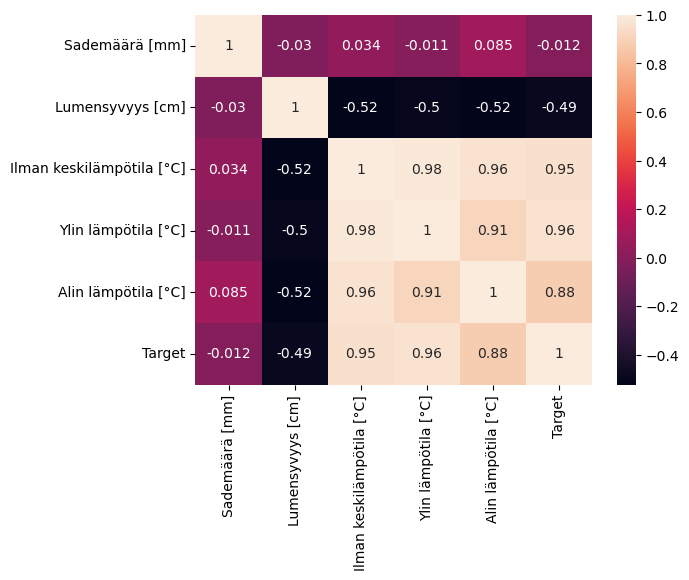

In [365]:
sns.heatmap(corr_matrix, annot=True)

In [143]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=.1)

In [231]:
# predictors = hki.columns[~hki.columns.isin(["Target", "Havaintoasema","Aika [Paikallinen aika]"])]
predictors = [
    "Sademäärä [mm]",
    "Lumensyvyys [cm]",
    "Ilman keskilämpötila [°C]",
    "Ylin lämpötila [°C]",
    "Alin lämpötila [°C]"
]

In [233]:
predictors

['Sademäärä [mm]',
 'Lumensyvyys [cm]',
 'Ilman keskilämpötila [°C]',
 'Ylin lämpötila [°C]',
 'Alin lämpötila [°C]']

In [235]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["Target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["Target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [237]:
predictions = backtest(hki, rr, predictors)

In [238]:
predictions

,actual,prediction,diff
date,,,
2000-01-13,3.1,4.634485,1.534485
2000-01-14,-1.3,2.689815,3.989815
2000-01-15,2.0,-0.394274,2.394274
2000-01-16,2.0,2.964782,0.964782
2000-01-17,0.0,2.543068,2.543068
...,...,...,...
2025-02-15,-6.7,-4.824865,1.875135
2025-02-16,-4.7,-5.830962,1.130962
2025-02-17,-1.7,-3.983849,2.283849


In [241]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.947062422864101

In [243]:
predictions["diff"].mean()

1.947062422864101

In [245]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(hki, horizon, col):
    label = f"rolling_{horizon}_{col}"
    hki[label] = hki[col].rolling(horizon).mean()
    hki[f"{label}_pct"] = pct_diff(hki[label], hki[col])
    return hki
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["Sademäärä [mm]", "Lumensyvyys [cm]", "Ilman keskilämpötila [°C]","Ylin lämpötila [°C]", "Alin lämpötila [°C]"]:
        hki = compute_rolling(hki, horizon, col)

In [247]:
hki

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target,rolling_3_Sademäärä [mm],rolling_3_Sademäärä [mm]_pct,...,month_avg_Sademäärä [mm],day_avg_Sademäärä [mm],month_avg_Lumensyvyys [cm],day_avg_Lumensyvyys [cm],month_avg_Ilman keskilämpötila [°C],day_avg_Ilman keskilämpötila [°C],month_avg_Ylin lämpötila [°C],day_avg_Ylin lämpötila [°C],month_avg_Alin lämpötila [°C],day_avg_Alin lämpötila [°C]
date,,,,,,,,,,,,,,,,,,,,,
1990-01-15,Vantaa Helsinki-Vantaan lentoasema,02:00,11.0,29.0,-8.9,-2.5,-20.5,0.3,NaN,NaN,...,11.000000,11.000000,29.000000,29.000000,-8.900000,-8.900000,-2.500000,-2.500000,-20.500000,-20.500000
1990-01-16,Vantaa Helsinki-Vantaan lentoasema,02:00,0.3,34.0,-2.7,0.3,-5.8,2.3,NaN,NaN,...,5.650000,0.300000,31.500000,34.000000,-5.800000,-2.700000,-1.100000,0.300000,-13.150000,-5.800000
1990-01-17,Vantaa Helsinki-Vantaan lentoasema,02:00,3.8,34.0,-3.3,2.3,-7.8,2.9,5.033333,-0.245033,...,5.033333,3.800000,32.333333,34.000000,-4.966667,-3.300000,0.033333,2.300000,-11.366667,-7.800000
1990-01-18,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,32.0,-2.0,2.9,-8.3,-7.6,1.400000,-0.928571,...,3.800000,0.100000,32.250000,32.000000,-4.225000,-2.000000,0.750000,2.900000,-10.600000,-8.300000
1990-01-19,Vantaa Helsinki-Vantaan lentoasema,02:00,0.6,32.0,-13.9,-7.6,-17.9,1.6,1.500000,-0.600000,...,3.160000,0.600000,32.200000,32.000000,-6.160000,-13.900000,-0.920000,-7.600000,-12.060000,-17.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,2.0,-8.4,-6.2,-12.5,-6.7,-1.000000,-0.000000,...,1.409462,1.305556,22.607570,22.000000,-4.533665,-4.325000,-1.727092,-1.380556,-7.598108,-7.150000
2025-02-16,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,2.0,-10.7,-6.7,-16.2,-4.7,0.100000,22.000000,...,1.410348,2.227778,22.587065,22.194444,-4.539801,-4.227778,-1.732040,-1.766667,-7.606667,-7.141667
2025-02-17,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,7.0,-8.4,-4.7,-13.1,-1.7,0.100000,-11.000000,...,1.407952,1.936111,22.571571,23.000000,-4.543638,-4.336111,-1.734990,-1.513889,-7.612127,-6.797222


In [249]:
hki = hki.iloc[14:,:]

In [251]:
hki

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target,rolling_3_Sademäärä [mm],rolling_3_Sademäärä [mm]_pct,...,month_avg_Sademäärä [mm],day_avg_Sademäärä [mm],month_avg_Lumensyvyys [cm],day_avg_Lumensyvyys [cm],month_avg_Ilman keskilämpötila [°C],day_avg_Ilman keskilämpötila [°C],month_avg_Ylin lämpötila [°C],day_avg_Ylin lämpötila [°C],month_avg_Alin lämpötila [°C],day_avg_Alin lämpötila [°C]
date,,,,,,,,,,,,,,,,,,,,,
1990-01-29,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,33.0,1.3,2.6,-0.4,2.0,2.733333,-0.158537,...,4.906667,2.300000,32.266667,33.000000,-3.046667,1.300000,0.366667,2.600000,-7.640000,-0.400000
1990-01-30,Vantaa Helsinki-Vantaan lentoasema,02:00,0.6,29.0,0.7,2.0,-0.4,2.2,2.900000,-0.793103,...,4.637500,0.600000,32.062500,29.000000,-2.812500,0.700000,0.468750,2.000000,-7.187500,-0.400000
1990-01-31,Vantaa Helsinki-Vantaan lentoasema,02:00,3.4,29.0,1.1,2.2,-0.1,3.6,2.100000,0.619048,...,4.564706,3.400000,31.882353,29.000000,-2.582353,1.100000,0.570588,2.200000,-6.770588,-0.100000
1990-02-01,Vantaa Helsinki-Vantaan lentoasema,02:00,0.5,26.0,2.2,3.6,1.2,3.2,1.500000,-0.666667,...,0.500000,0.500000,26.000000,26.000000,2.200000,2.200000,3.600000,3.600000,1.200000,1.200000
1990-02-02,Vantaa Helsinki-Vantaan lentoasema,02:00,3.8,23.0,2.3,3.2,1.3,2.5,2.566667,0.480519,...,2.150000,3.800000,24.500000,23.000000,2.250000,2.300000,3.400000,3.200000,1.250000,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,2.0,-8.4,-6.2,-12.5,-6.7,-1.000000,-0.000000,...,1.409462,1.305556,22.607570,22.000000,-4.533665,-4.325000,-1.727092,-1.380556,-7.598108,-7.150000
2025-02-16,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,2.0,-10.7,-6.7,-16.2,-4.7,0.100000,22.000000,...,1.410348,2.227778,22.587065,22.194444,-4.539801,-4.227778,-1.732040,-1.766667,-7.606667,-7.141667
2025-02-17,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,7.0,-8.4,-4.7,-13.1,-1.7,0.100000,-11.000000,...,1.407952,1.936111,22.571571,23.000000,-4.543638,-4.336111,-1.734990,-1.513889,-7.612127,-6.797222


In [253]:
hki.apply(pd.isnull).sum() #Missing values due to division with 0

Havaintoasema                                 0
Aika [Paikallinen aika]                       0
Sademäärä [mm]                                0
Lumensyvyys [cm]                              0
Ilman keskilämpötila [°C]                     0
Ylin lämpötila [°C]                           0
Alin lämpötila [°C]                           0
Target                                        0
rolling_3_Sademäärä [mm]                      0
rolling_3_Sademäärä [mm]_pct                 49
rolling_3_Lumensyvyys [cm]                    0
rolling_3_Lumensyvyys [cm]_pct              467
rolling_3_Ilman keskilämpötila [°C]           0
rolling_3_Ilman keskilämpötila [°C]_pct       0
rolling_3_Ylin lämpötila [°C]                 0
rolling_3_Ylin lämpötila [°C]_pct             0
rolling_3_Alin lämpötila [°C]                 0
rolling_3_Alin lämpötila [°C]_pct             0
rolling_14_Sademäärä [mm]                     0
rolling_14_Sademäärä [mm]_pct                 0
rolling_14_Lumensyvyys [cm]             

In [257]:
hki = hki.fillna(0)

In [259]:
hki.apply(pd.isnull).sum()

Havaintoasema                               0
Aika [Paikallinen aika]                     0
Sademäärä [mm]                              0
Lumensyvyys [cm]                            0
Ilman keskilämpötila [°C]                   0
Ylin lämpötila [°C]                         0
Alin lämpötila [°C]                         0
Target                                      0
rolling_3_Sademäärä [mm]                    0
rolling_3_Sademäärä [mm]_pct                0
rolling_3_Lumensyvyys [cm]                  0
rolling_3_Lumensyvyys [cm]_pct              0
rolling_3_Ilman keskilämpötila [°C]         0
rolling_3_Ilman keskilämpötila [°C]_pct     0
rolling_3_Ylin lämpötila [°C]               0
rolling_3_Ylin lämpötila [°C]_pct           0
rolling_3_Alin lämpötila [°C]               0
rolling_3_Alin lämpötila [°C]_pct           0
rolling_14_Sademäärä [mm]                   0
rolling_14_Sademäärä [mm]_pct               0
rolling_14_Lumensyvyys [cm]                 0
rolling_14_Lumensyvyys [cm]_pct   

In [261]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["Sademäärä [mm]", "Lumensyvyys [cm]", "Ilman keskilämpötila [°C]","Ylin lämpötila [°C]", "Alin lämpötila [°C]"]:
    hki[f"month_avg_{col}"] = hki[col].groupby(hki.index.month, group_keys=False).apply(expand_mean)
    hki[f"day_avg_{col}"] = hki[col].groupby(hki.index.day_of_year, group_keys=False).apply(expand_mean)

In [263]:
hki

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target,rolling_3_Sademäärä [mm],rolling_3_Sademäärä [mm]_pct,...,month_avg_Sademäärä [mm],day_avg_Sademäärä [mm],month_avg_Lumensyvyys [cm],day_avg_Lumensyvyys [cm],month_avg_Ilman keskilämpötila [°C],day_avg_Ilman keskilämpötila [°C],month_avg_Ylin lämpötila [°C],day_avg_Ylin lämpötila [°C],month_avg_Alin lämpötila [°C],day_avg_Alin lämpötila [°C]
date,,,,,,,,,,,,,,,,,,,,,
1990-01-29,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,33.0,1.3,2.6,-0.4,2.0,2.733333,-0.158537,...,2.300000,2.300000,33.000000,33.000000,1.300000,1.300000,2.600000,2.600000,-0.400000,-0.400000
1990-01-30,Vantaa Helsinki-Vantaan lentoasema,02:00,0.6,29.0,0.7,2.0,-0.4,2.2,2.900000,-0.793103,...,1.450000,0.600000,31.000000,29.000000,1.000000,0.700000,2.300000,2.000000,-0.400000,-0.400000
1990-01-31,Vantaa Helsinki-Vantaan lentoasema,02:00,3.4,29.0,1.1,2.2,-0.1,3.6,2.100000,0.619048,...,2.100000,3.400000,30.333333,29.000000,1.033333,1.100000,2.266667,2.200000,-0.300000,-0.100000
1990-02-01,Vantaa Helsinki-Vantaan lentoasema,02:00,0.5,26.0,2.2,3.6,1.2,3.2,1.500000,-0.666667,...,0.500000,0.500000,26.000000,26.000000,2.200000,2.200000,3.600000,3.600000,1.200000,1.200000
1990-02-02,Vantaa Helsinki-Vantaan lentoasema,02:00,3.8,23.0,2.3,3.2,1.3,2.5,2.566667,0.480519,...,2.150000,3.800000,24.500000,23.000000,2.250000,2.300000,3.400000,3.200000,1.250000,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-15,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,2.0,-8.4,-6.2,-12.5,-6.7,-1.000000,-0.000000,...,1.409462,1.305556,22.607570,22.000000,-4.533665,-4.325000,-1.727092,-1.380556,-7.598108,-7.150000
2025-02-16,Vantaa Helsinki-Vantaan lentoasema,02:00,2.3,2.0,-10.7,-6.7,-16.2,-4.7,0.100000,22.000000,...,1.410348,2.227778,22.587065,22.194444,-4.539801,-4.227778,-1.732040,-1.766667,-7.606667,-7.141667
2025-02-17,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,7.0,-8.4,-4.7,-13.1,-1.7,0.100000,-11.000000,...,1.407952,1.936111,22.571571,23.000000,-4.543638,-4.336111,-1.734990,-1.513889,-7.612127,-6.797222


In [269]:
predictors = [
    "Sademäärä [mm]",
    "Lumensyvyys [cm]",
    "Ilman keskilämpötila [°C]",
    "Ylin lämpötila [°C]",
    "Alin lämpötila [°C]"
]

In [271]:
predictors

['Sademäärä [mm]',
 'Lumensyvyys [cm]',
 'Ilman keskilämpötila [°C]',
 'Ylin lämpötila [°C]',
 'Alin lämpötila [°C]']

In [279]:
predictions = backtest(hki, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.945793669209279

In [283]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.945793669209279

In [285]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
date,,,
2006-01-22,-2.5,-18.219219,15.719219
2024-01-07,-3.1,-18.324178,15.224178
2017-01-06,-1.3,-15.109756,13.809756
2003-01-10,-3.6,-16.838947,13.238947
2014-12-29,0.4,-12.706232,13.106232
...,...,...,...
2016-09-11,20.3,20.299027,0.000973
2012-08-16,23.2,23.199464,0.000536
2018-07-28,28.3,28.300394,0.000394


In [289]:
hki.loc["2006-01-12":"2006-01-30"] #check anomalies in temp regard to jan 22 2006

,Havaintoasema,Aika [Paikallinen aika],Sademäärä [mm],Lumensyvyys [cm],Ilman keskilämpötila [°C],Ylin lämpötila [°C],Alin lämpötila [°C],Target,rolling_3_Sademäärä [mm],rolling_3_Sademäärä [mm]_pct,...,month_avg_Sademäärä [mm],day_avg_Sademäärä [mm],month_avg_Lumensyvyys [cm],day_avg_Lumensyvyys [cm],month_avg_Ilman keskilämpötila [°C],day_avg_Ilman keskilämpötila [°C],month_avg_Ylin lämpötila [°C],day_avg_Ylin lämpötila [°C],month_avg_Alin lämpötila [°C],day_avg_Alin lämpötila [°C]
date,,,,,,,,,,,,,,,,,,,,,
2006-01-12,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,0.0,2.0,3.5,1.0,2.2,1.000000,-2.000000,...,1.672292,1.931250,9.289583,7.562500,-3.772917,-2.862500,-1.294375,-0.831250,-6.732917,-5.081250
2006-01-13,Vantaa Helsinki-Vantaan lentoasema,02:00,0.0,0.0,0.3,2.2,-3.6,1.7,0.533333,-1.000000,...,1.668815,2.300000,9.270270,8.187500,-3.764449,-2.762500,-1.287110,-0.618750,-6.726403,-5.562500
2006-01-14,Vantaa Helsinki-Vantaan lentoasema,02:00,-1.0,0.0,0.2,1.7,-1.4,2.1,-0.666667,0.500000,...,1.663278,2.150000,9.251037,7.625000,-3.756224,-1.912500,-1.280913,0.250000,-6.715353,-5.706250
2006-01-15,Vantaa Helsinki-Vantaan lentoasema,02:00,0.0,0.0,-0.5,2.1,-1.9,-0.2,-0.333333,-1.000000,...,1.659834,1.512500,9.231884,7.812500,-3.749482,-1.050000,-1.273913,0.650000,-6.705383,-3.331250
2006-01-16,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,0.0,-1.1,-0.2,-1.6,-0.4,-0.300000,-1.333333,...,1.656612,2.137500,9.212810,7.000000,-3.744008,-0.612500,-1.271694,1.343750,-6.694835,-3.375000
2006-01-17,Vantaa Helsinki-Vantaan lentoasema,02:00,0.7,0.0,-3.8,-0.4,-7.3,-7.3,0.266667,1.625000,...,1.654639,0.950000,9.193814,7.562500,-3.744124,-1.362500,-1.269897,0.568750,-6.696082,-3.987500
2006-01-18,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,2.0,-14.8,-7.3,-18.3,-17.6,0.300000,-0.666667,...,1.651440,0.350000,9.179012,7.000000,-3.766872,-2.612500,-1.282305,-0.268750,-6.719959,-4.731250
2006-01-19,Vantaa Helsinki-Vantaan lentoasema,02:00,0.1,2.0,-20.7,-17.6,-22.0,-17.9,0.300000,-0.666667,...,1.648255,0.468750,9.164271,6.812500,-3.801643,-4.231250,-1.315811,-1.868750,-6.751335,-6.043750
2006-01-20,Vantaa Helsinki-Vantaan lentoasema,02:00,0.8,2.0,-20.4,-17.9,-22.8,-18.2,0.333333,1.400000,...,1.646516,2.687500,9.149590,6.812500,-3.835656,-5.506250,-1.349795,-2.306250,-6.784221,-8.625000


In [307]:
(predictions["diff"].round().value_counts().sort_index()) #Showing counts of different differences

diff
0.0     1545
1.0     2898
2.0     2108
3.0     1232
4.0      694
5.0      333
6.0      176
7.0       88
8.0       35
9.0       17
10.0      14
11.0       5
12.0       3
13.0       5
14.0       1
15.0       1
16.0       1
Name: count, dtype: int64

<Axes: xlabel='diff'>

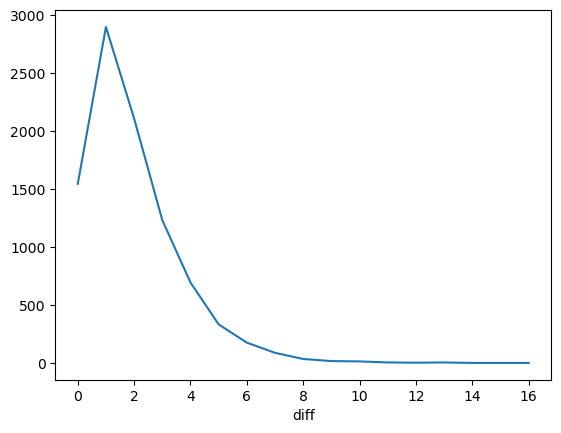

In [313]:
(predictions["diff"].round().value_counts().sort_index().plot())

In [315]:
predictions

,actual,prediction,diff
date,,,
2000-01-27,-1.8,0.802008,2.602008
2000-01-28,1.1,-0.964314,2.064314
2000-01-29,1.7,3.065645,1.365645
2000-01-30,-0.3,1.998039,2.298039
2000-01-31,-0.2,-1.071608,0.871608
...,...,...,...
2025-02-15,-6.7,-4.823697,1.876303
2025-02-16,-4.7,-5.833321,1.133321
2025-02-17,-1.7,-3.985400,2.285400
